Indice inicial para el ajuste lineal: 32
La función a ajustar es v(t) = a * t + v0, donde a= 0.7239593858498357 y v0= -0.7107875588625551


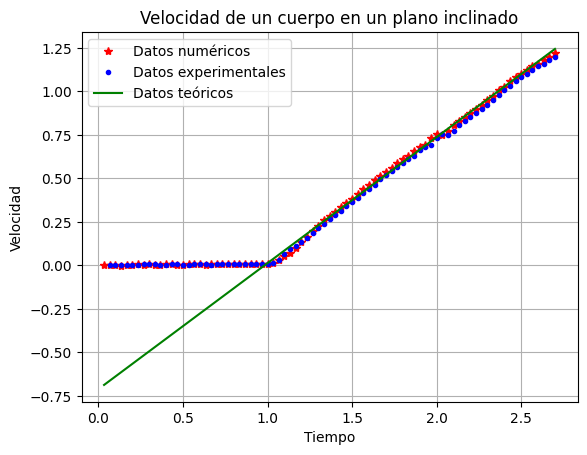

In [77]:
#Nombre: Samuel Cortes Salazar


import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

"""
Primero se importan los datos del archivo 'datos-carro-1d.csv', utilizando la función np.genfromtxt:
"""
archivo = np.transpose(np.genfromtxt('datos-carro-1d.csv', delimiter = ',', skip_header= 5, missing_values= 'nan'))

"""
La siguiente matriz, la cual utilizaremos para definir la derivada, está formada por 4 filas; en la primera estará el tiempo, en la segunda la magnitud de la posición,
en la tercera la magnitud de la velocidad y en la última la magnitud de la aceleración:
"""
datos = np.array([archivo[0], np.sqrt((archivo[1]**2) + (archivo[2]**2)), np.sqrt((archivo[3]**2) + (archivo[4]**2)), np.sqrt((archivo[5]**2) + (archivo[6]**2))])

"""
Se define tanto el bucle que realiza la derivación numérica (derivada central), como el arreglo que contiene los resultados:
"""
central = np.zeros(81)
for i in range(1,82):
  central[i-1] = (datos[1,i+1]-datos[1,i-1])/(datos[0,i+1]-datos[0,i-1])

"""
Ahora, para realizar el ajuste lineal, primero debemos considerar lo siguiente. Si solamente graficamos los datos experimentales o los datos numéricos,
vamos a notar que la gráfica al inicio toma varios valores cercanos al cero y después sí se comporta linealmente. Por lo tanto, para realizar el ajuste lineal, debemos considerar
sólo los elementos que exhiban dicho comportamiento. Para ello, vamos a identificar primero desde qué indice las velocidades empiezan a alejarse del cero, considerando un valor umbral de 0.03:
"""
umbral = 0.03
indice = np.argmax(central > umbral)
print('Indice inicial para el ajuste lineal:',indice)

"""
Una vez determinado el índice inicial, utilizaremos la librería de SciPy, junto con la función stats.linregress que nos permite obtener la pendiente y la intersección, además de otros valores
importantes como el coeficiente de correlación, el valor promedio o la desviación estándar:
"""
pendiente, interseccion, coef_corr, valor_p, std_err = stats.linregress(datos[0,32:81],central[32:81])

"""
Obtenemos primero los coeficientes del ajuste lineal:
"""
print('La función a ajustar es v(t) = a * t + v0, donde a=',pendiente, 'y v0=',interseccion)
#print("Coeficiente de correlación (r):", coef_corr)
#print("Valor p:", valor_p)
#print("Desviación estándar:", std_err)

"""
Calculamos la línea de regresión:
"""
linea_regresion = pendiente * archivo[0,0:81] + interseccion

plt.plot(datos[0,0:81],central, '*r', label='Datos numéricos')
plt.plot(datos[0,0:81],datos[2,0:81], '.b', label='Datos experimentales')
plt.plot(datos[0,0:81], linea_regresion, '-g', label='Datos teóricos')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.title('Velocidad de un cuerpo en un plano inclinado')
plt.legend()
plt.grid(True)
plt.show()

La aceleración obtenida al hacer el ajuste no lineal es  a= 0.7172115181834786
La aceleración obtenida al hacer el ajuste lineal es  a= 0.7239593858498357
La aceleración promedio de los datos experimentales es a= 0.7189560179776153


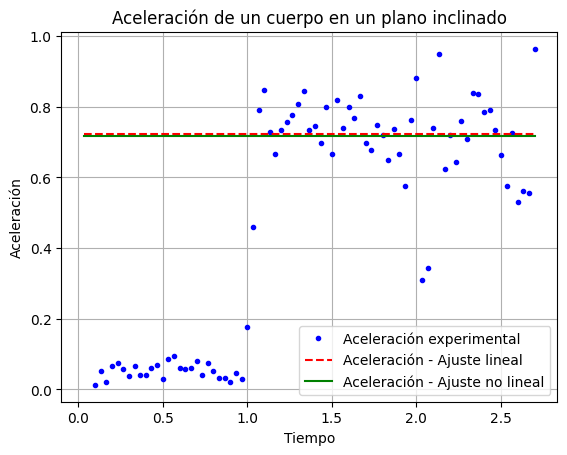

In [90]:
"""
Ahora, vamos a determinar la aceleración que siente el cuerpo a partir de otros dos métodos. En el primero, vamos a realizar un ajuste no lineal sobre los datos de tiempo y posición:
"""

from scipy.optimize import curve_fit


"""
Definimos la función a ajustar:
"""
def posicion(t,a,b,c):
  return a + b * t + c * t**2

"""
Determinamos los parámetros óptimos que ajustan nuestra función a los datos obtenidos, gracias a la función curve_fit:
"""
params_opt, params_cov = curve_fit(posicion, datos[0,32:], datos[1,32:])
a_opt, b_opt, c_opt = params_opt

#print("a =", a_opt)
#print("b =", b_opt)
print("La aceleración obtenida al hacer el ajuste no lineal es  a=", 2 * c_opt)

"""
Evaluamos la función en los parámetros óptimos:
"""
#x_fit = posicion(datos[0,:], a_opt, b_opt, c_opt)

# Graficar
# plt.scatter(datos[0,:], datos[1,:], label='Datos experimentales')
# plt.plot(datos[0,:], x_fit, label='Ajuste', color='red')
# plt.legend()
# plt.show()

print("La aceleración obtenida al hacer el ajuste lineal es  a=", pendiente)

"""
De los datos experimentales, determinamos el valor promedio y la desviación estándar, considerando nuevamente que aproximadamente en el índice 32 los valores dejan de ser relativamente nulos:
"""


print("La aceleración promedio de los datos experimentales es a=", np.mean(datos[3,32:81]))


plt.plot(datos[0,0:81], datos[3,0:81], '.b', label='Aceleración experimental')
plt.plot(datos[0,0:81], pendiente * np.ones(81), '--r', label='Aceleración - Ajuste lineal')
plt.plot(datos[0,0:81], 2 * c_opt * np.ones(81), '-g', label='Aceleración - Ajuste no lineal')
plt.xlabel('Tiempo')
plt.ylabel('Aceleración')
plt.title('Aceleración de un cuerpo en un plano inclinado')
plt.legend()
plt.grid(True)
plt.show()
